In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [37]:
img1 = cv2.imread('img/img3-1.png')
img2 = cv2.imread('img/img3-2.png')

In [38]:
img1.shape

(592, 589, 3)

In [39]:
img2.shape

(592, 589, 3)

In [40]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [41]:
blur1 = cv2.GaussianBlur(gray1, (5, 5), 0)
blur2 = cv2.GaussianBlur(gray2, (5, 5), 0)

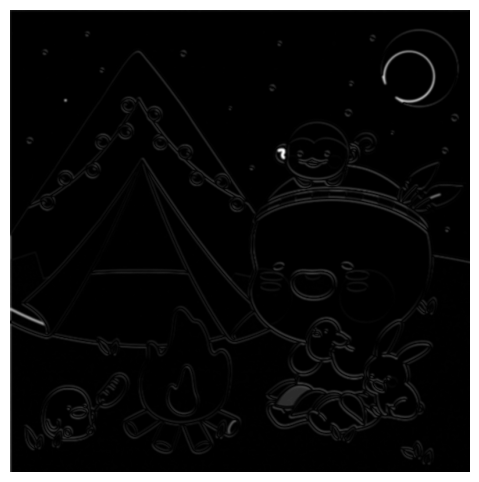

In [42]:
diff = cv2.absdiff(blur1, blur2)

plt.figure(figsize=(6, 6))
plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.show()

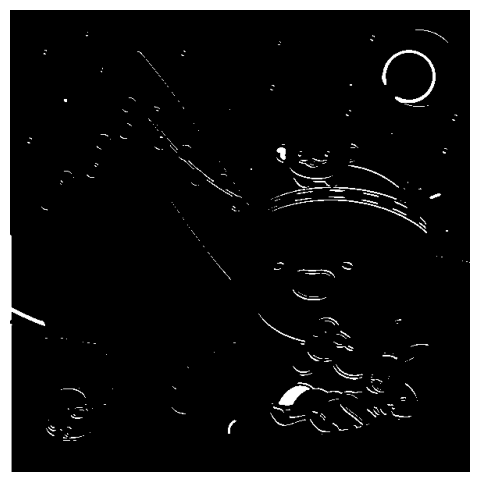

In [43]:
_, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

In [44]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

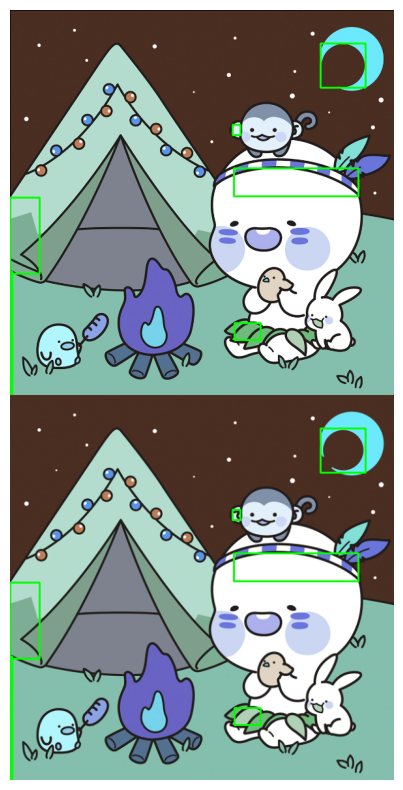

In [45]:
for contour in contours:
    if cv2.contourArea(contour) > 100:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)

combined = np.vstack((img1, img2))

plt.figure(figsize=(10, 10))
plt.imshow(combined)
plt.axis('off')
plt.show()